<a href="https://colab.research.google.com/github/KJOELJOYSON2427/Stock_Prediction_LSTM/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
# Import libraries
import pandas as pd
import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Define time period: last 1 year
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download each stock's data using yfinance
company_data = {}  # store data in a dictionary instead of using globals()

for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)


#Add company name column to each DataFrame

company_names ={
    'AAPL': 'APPLE',
    'GOOG': 'GOOGLE',
    'MSFT': 'MICROSOFT',
    'AMZN': 'AMAZON'
}

for ticker, name in company_names.items():
   company_data[ticker]['company_name'] = name


# Combine all company DataFrames into one
df = pd.concat(company_data.values(), axis=0)

# Display the last 10 rows



/tmp/ipython-input-3953641059.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3953641059.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3953641059.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3953641059.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head(10)

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-13,224.106415,225.629525,221.757040,223.001412,48566200.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-14,227.192459,227.839526,223.986956,224.006870,44923900.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-15,223.986954,225.898307,223.260245,225.380644,47923700.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-18,226.993378,228.705635,224.156203,224.235845,44633700.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-19,227.252197,229.123738,225.639496,225.958047,36211800.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-20,227.968948,228.894754,224.872950,227.033178,35169600.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-21,227.491119,229.123735,224.693774,227.849499,42108300.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-22,228.835037,229.681216,227.033189,227.033189,38168300.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
company_data.values()

dict_values([Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-11-13  224.106415  225.629525  221.757040  223.001412  48566200   
2024-11-14  227.192459  227.839526  223.986956  224.006870  44923900   
2024-11-15  223.986954  225.898307  223.260245  225.380644  47923700   
2024-11-18  226.993378  228.705635  224.156203  224.235845  44633700   
2024-11-19  227.252197  229.123738  225.639496  225.958047  36211800   
...                ...         ...         ...         ...       ...   
2025-11-06  269.508728  273.135217  267.630574  267.630574  51204000   
2025-11-07  268.209991  272.026299  266.511626  269.538690  48227400   
2025-11-10  269.429993  273.730011  267.459991  268.959991  41312400   
2025-11-11  275.250000  275.910004  269.799988  269.809998  46208300   
2025-11-12  273.470001  275.730011  271.700012  275

In [6]:
company_data['AAPL'].describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,227.329315,229.678595,224.694329,227.000605,5.453617e+07
std,21.558872,21.181111,21.711524,21.532344,2.324259e+07
min,171.832413,189.691342,168.633361,171.364024,2.323470e+07
25%,209.571266,211.558622,207.377665,209.531347,4.086815e+07
50%,227.754181,230.545577,225.685336,227.600163,4.796850e+07
75%,243.415691,245.057018,240.783509,243.130381,5.723262e+07
max,275.250000,277.051436,271.700012,276.721738,1.843959e+08


In [7]:
company_data['GOOG'].head()

Price,Close,High,Low,Open,Volume,company_name
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,
2024-11-13,179.703506,181.819247,179.335108,181.356261,13969700,GOOGLE
2024-11-14,176.577179,179.658693,175.262924,178.966715,17925800,GOOGLE
2024-11-15,173.132248,175.113582,171.992233,174.874622,21708900,GOOGLE
2024-11-18,176.029587,176.139108,173.659953,174.192625,18662800,GOOGLE
2024-11-19,178.797440,179.384865,174.352888,174.471373,15392900,GOOGLE


In [8]:
company_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-11-13 to 2025-11-12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [9]:
company_data['AAPL'].isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
company_name,,0


In [10]:
company_list= [company_data[ticker] for ticker in tech_list]
company_list

[Price            Close        High         Low        Open    Volume  \
 Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
 Date                                                                   
 2024-11-13  224.106415  225.629525  221.757040  223.001412  48566200   
 2024-11-14  227.192459  227.839526  223.986956  224.006870  44923900   
 2024-11-15  223.986954  225.898307  223.260245  225.380644  47923700   
 2024-11-18  226.993378  228.705635  224.156203  224.235845  44633700   
 2024-11-19  227.252197  229.123738  225.639496  225.958047  36211800   
 ...                ...         ...         ...         ...       ...   
 2025-11-06  269.508728  273.135217  267.630574  267.630574  51204000   
 2025-11-07  268.209991  272.026299  266.511626  269.538690  48227400   
 2025-11-10  269.429993  273.730011  267.459991  268.959991  41312400   
 2025-11-11  275.250000  275.910004  269.799988  269.809998  46208300   
 2025-11-12  273.470001  275.730011  271.700012  27

In [11]:
plt.figure(figsize=(15, 10
                    ))
plt.subplots_adjust(top=1.25, bottom=1.2)

<Figure size 1500x1000 with 0 Axes>

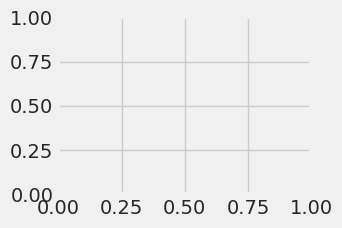

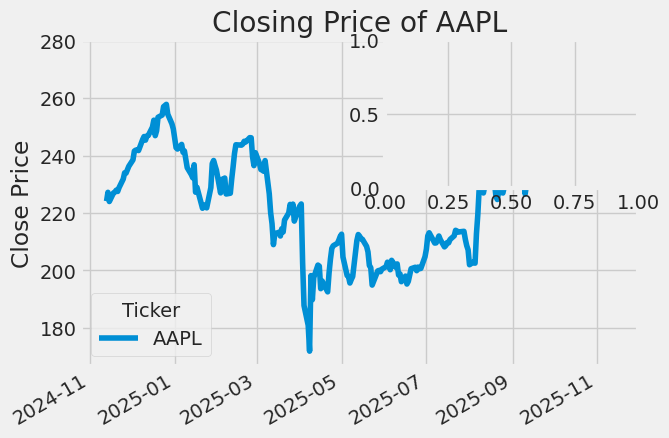

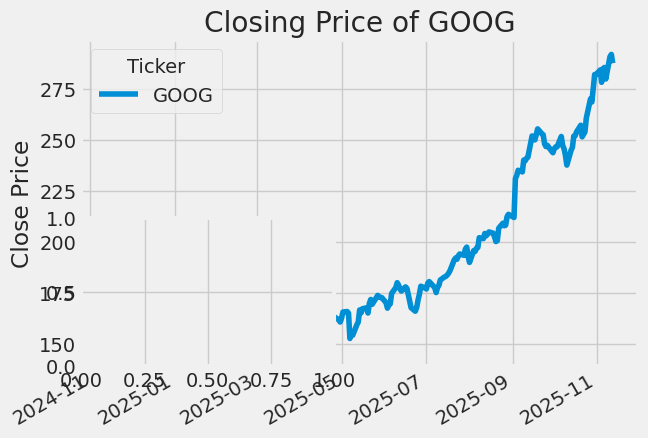

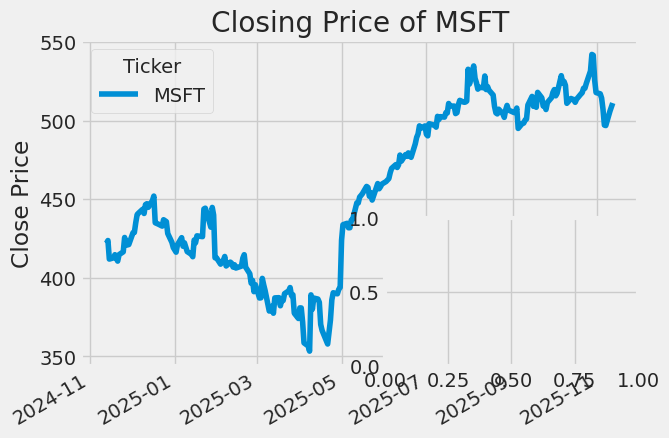

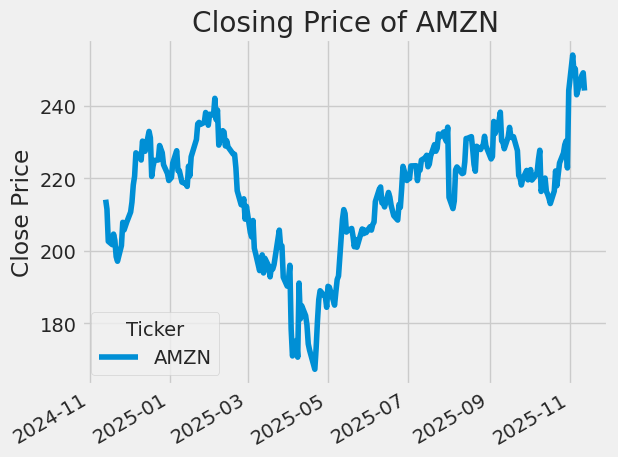

In [12]:

for i, (ticker, company) in enumerate(zip(tech_list, company_list),1):
  plt.subplot(2, 2, i)
  company['Close'].plot()  # ✅ changed from 'Adj Close' to 'Close'
  plt.ylabel('Close Price')
  plt.xlabel(None)
  plt.title(f"Closing Price of {ticker}")
plt.tight_layout()
plt.show()

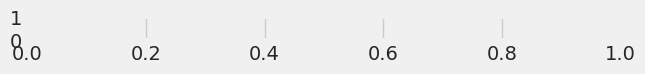

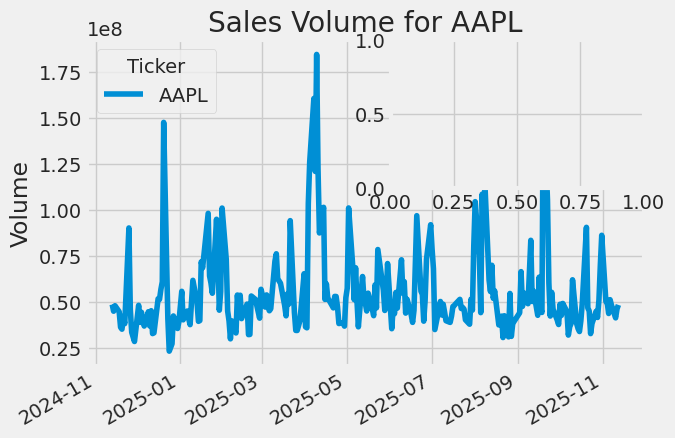

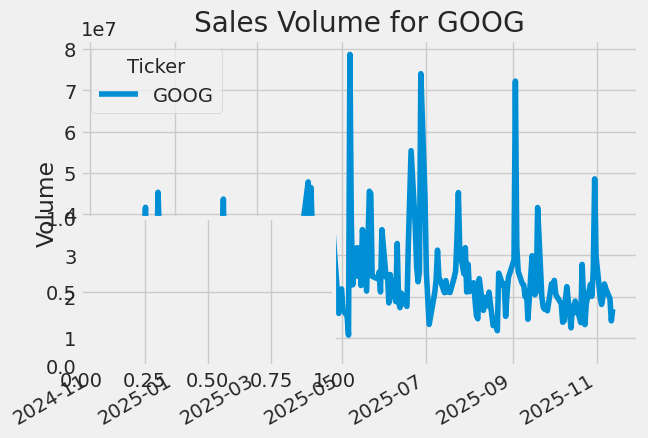

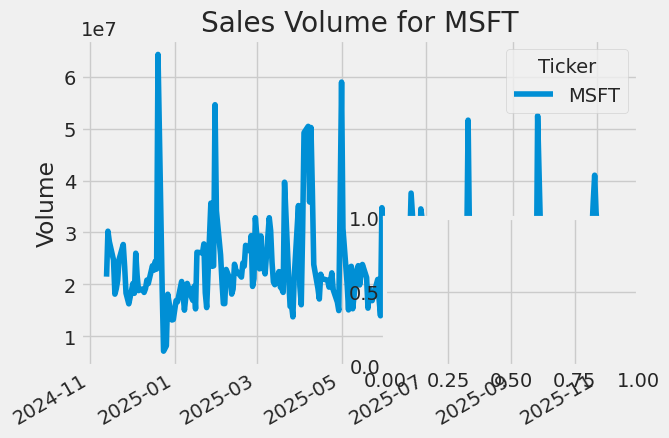

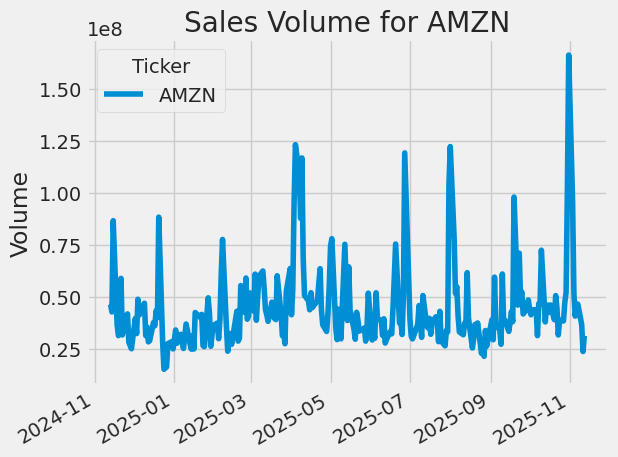

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (ticker, company) in enumerate(zip(tech_list, company_list),1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()  # ✅ changed from 'Adj Close' to 'Close'
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {ticker}")
plt.tight_layout()
plt.show()

# What was the moving average of the various stocks?

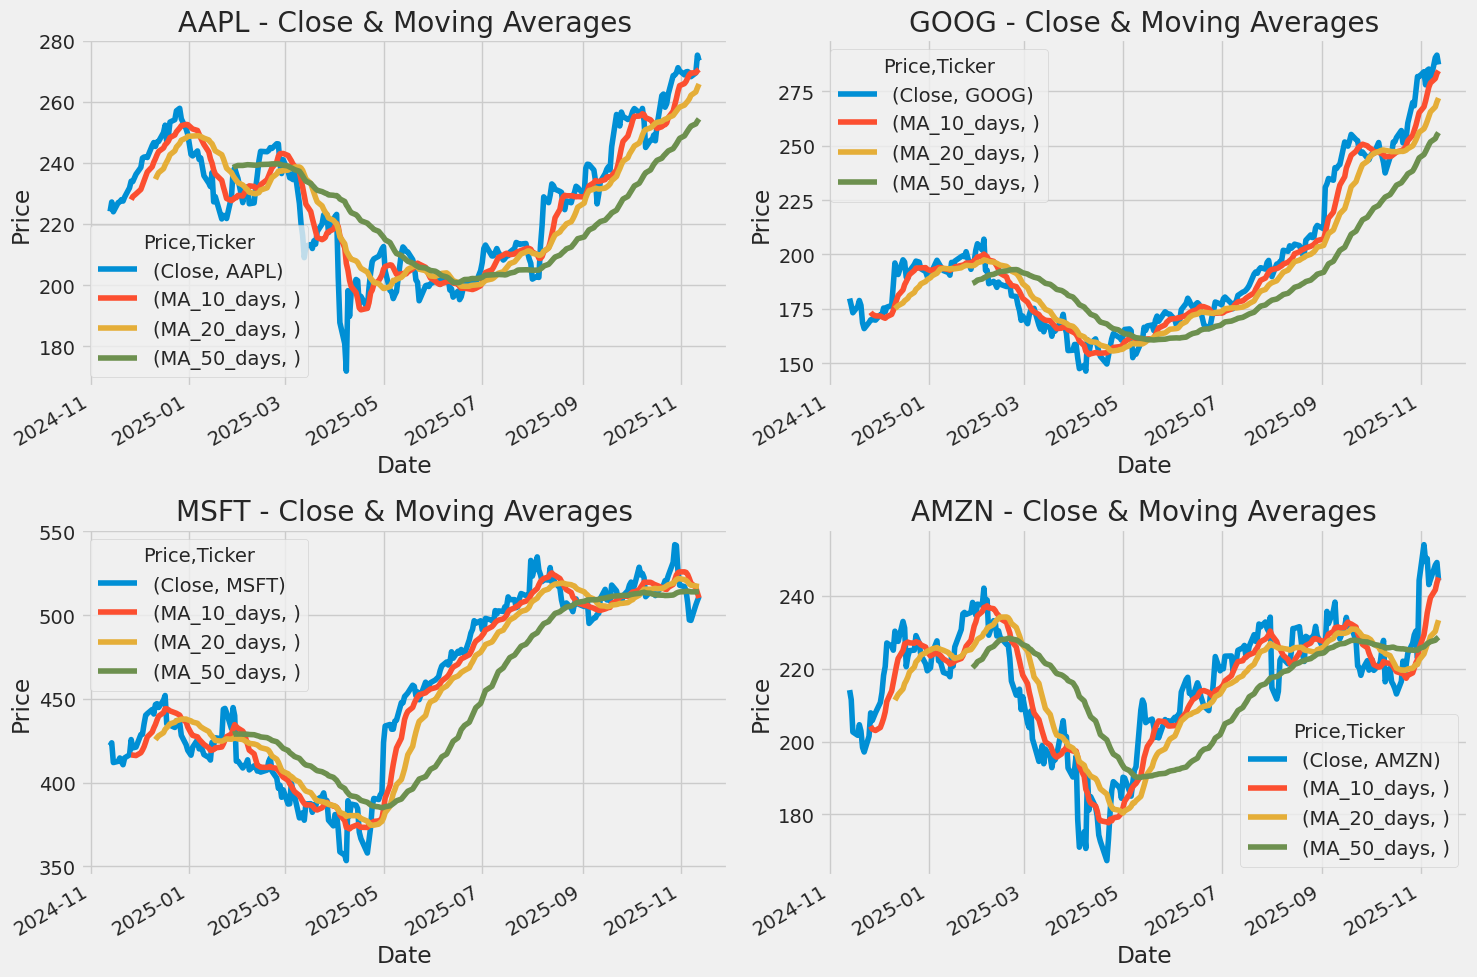

In [14]:
import matplotlib.pyplot as plt

# Calculate Moving Averages (MA)
ma_days = [10, 20, 50]
for ma in ma_days:
    for ticker in tech_list:
        column_name = f"MA_{ma}_days"
        company_data[ticker][column_name] = company_data[ticker]['Close'].rolling(window=ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot each company with its moving averages
for ax, ticker in zip(axes.flat, tech_list):
    company_data[ticker][['Close', 'MA_10_days', 'MA_20_days', 'MA_50_days']].plot(ax=ax)
    ax.set_title(f"{ticker} - Close & Moving Averages")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

plt.tight_layout()
plt.show()


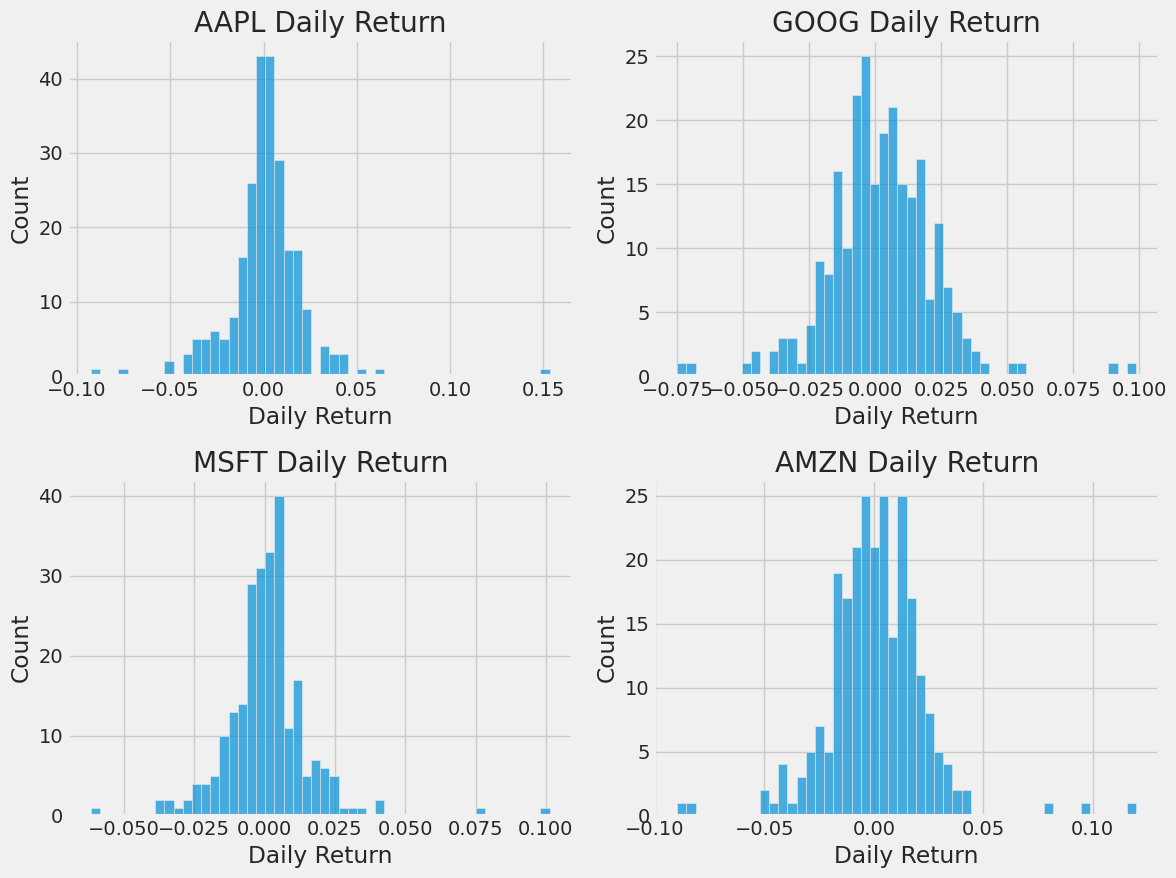

In [15]:
import matplotlib.pyplot as plt

# Calculate Daily Return for each company
for ticker in tech_list:
    company_data[ticker]['Daily Return'] = company_data[ticker]['Close'].pct_change()

# Plot histograms of Daily Returns
plt.figure(figsize=(12, 9))

for i, ticker in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    company_data[ticker]['Daily Return'].hist(bins=50, alpha=0.7)
    plt.xlabel('Daily Return')
    plt.ylabel('Count')
    plt.title(f'{ticker} Daily Return')

plt.tight_layout()
plt.show()


In [44]:
closing_prices_dict ={
    ticker: company_data[ticker][('Close', ticker)] for ticker in tech_list
}

print(closing_prices_dict.items())

dict_items([('AAPL', Date
2024-11-13    224.106415
2024-11-14    227.192459
2024-11-15    223.986954
2024-11-18    226.993378
2024-11-19    227.252197
                 ...    
2025-11-06    269.508728
2025-11-07    268.209991
2025-11-10    269.429993
2025-11-11    275.250000
2025-11-12    273.470001
Name: (Close, AAPL), Length: 250, dtype: float64), ('GOOG', Date
2024-11-13    179.703506
2024-11-14    176.577179
2024-11-15    173.132248
2024-11-18    176.029587
2024-11-19    178.797440
                 ...    
2025-11-06    285.339996
2025-11-07    279.700012
2025-11-10    290.589996
2025-11-11    291.739990
2025-11-12    287.429993
Name: (Close, GOOG), Length: 250, dtype: float64), ('MSFT', Date
2024-11-13    422.031586
2024-11-14    423.709015
2024-11-15    411.907593
2024-11-18    412.661926
2024-11-19    414.676819
                 ...    
2025-11-06    497.100006
2025-11-07    496.820007
2025-11-10    506.000000
2025-11-11    508.679993
2025-11-12    511.140015
Name: (Close, MSFT)

In [45]:
closing_df=pd.DataFrame(closing_prices_dict)
tech_rets=closing_df.pct_change()
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2024-11-13,NaN,NaN,NaN,NaN
2024-11-14,0.013770,-0.017397,0.003975,-0.012237
2024-11-15,-0.014109,-0.019509,-0.027853,-0.041942
2024-11-18,0.013422,0.016735,0.001831,-0.004491
2024-11-19,0.001140,0.015724,0.004883,0.014427


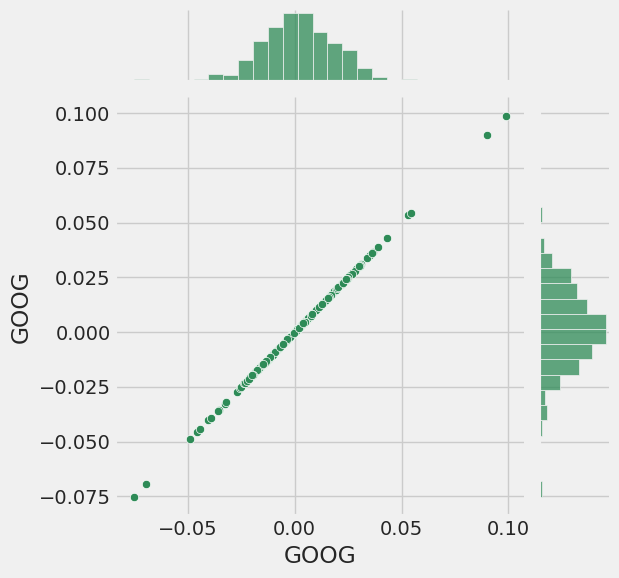

In [26]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind="scatter" , color="seagreen")

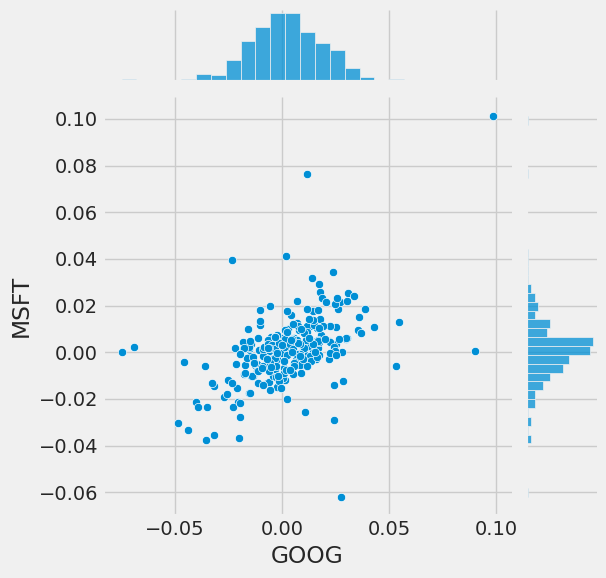

In [27]:
#We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

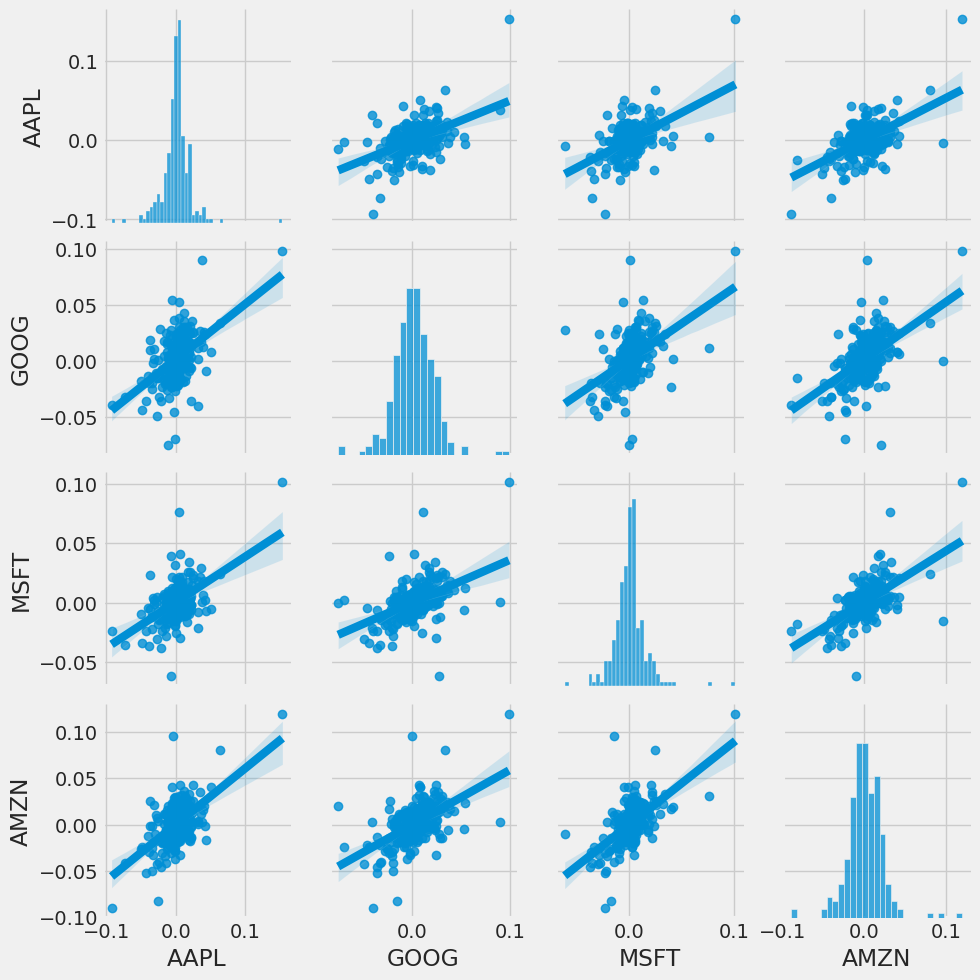

In [28]:
sns.pairplot(tech_rets, kind='reg')

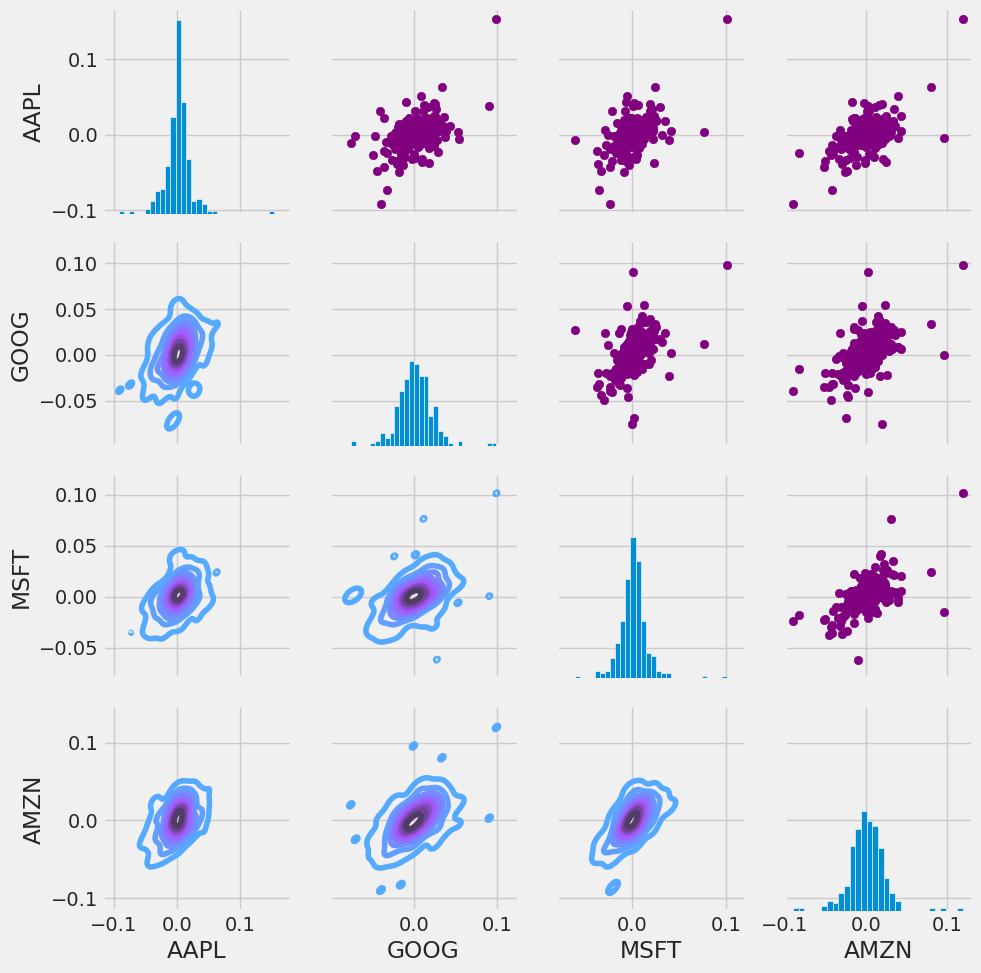

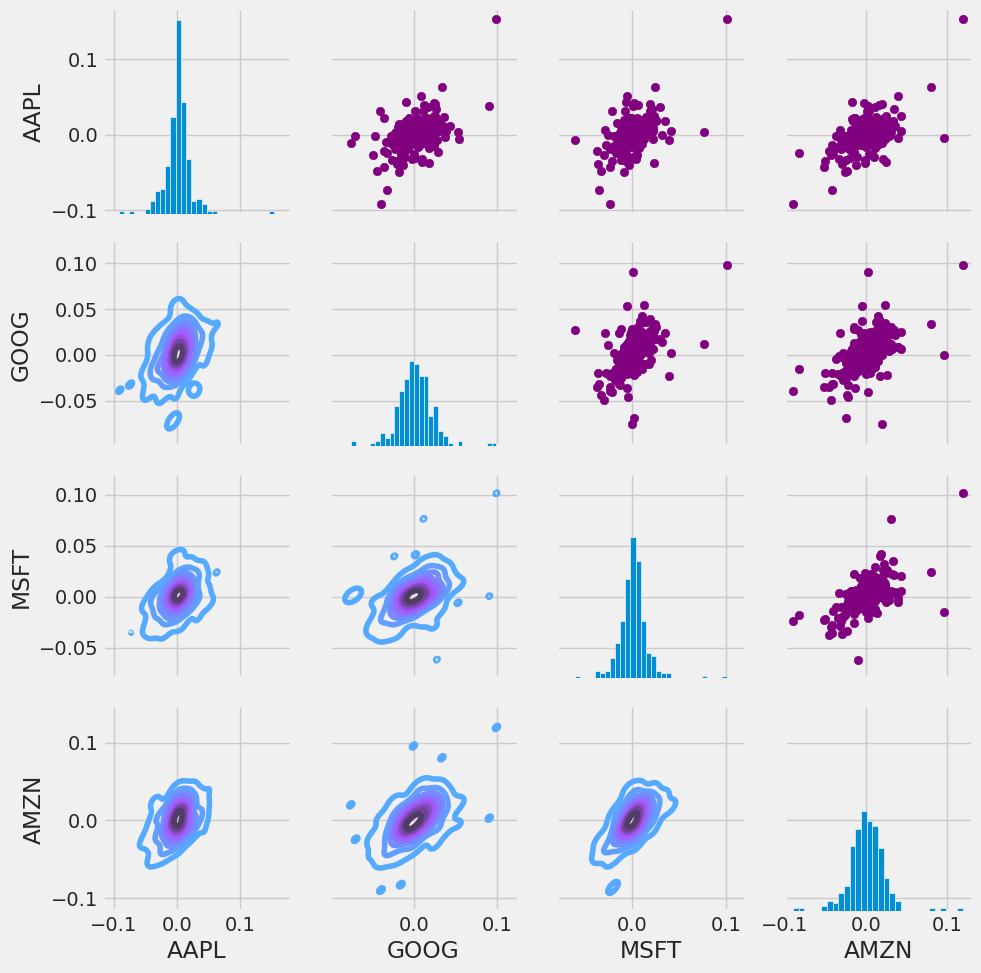

In [31]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')
# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

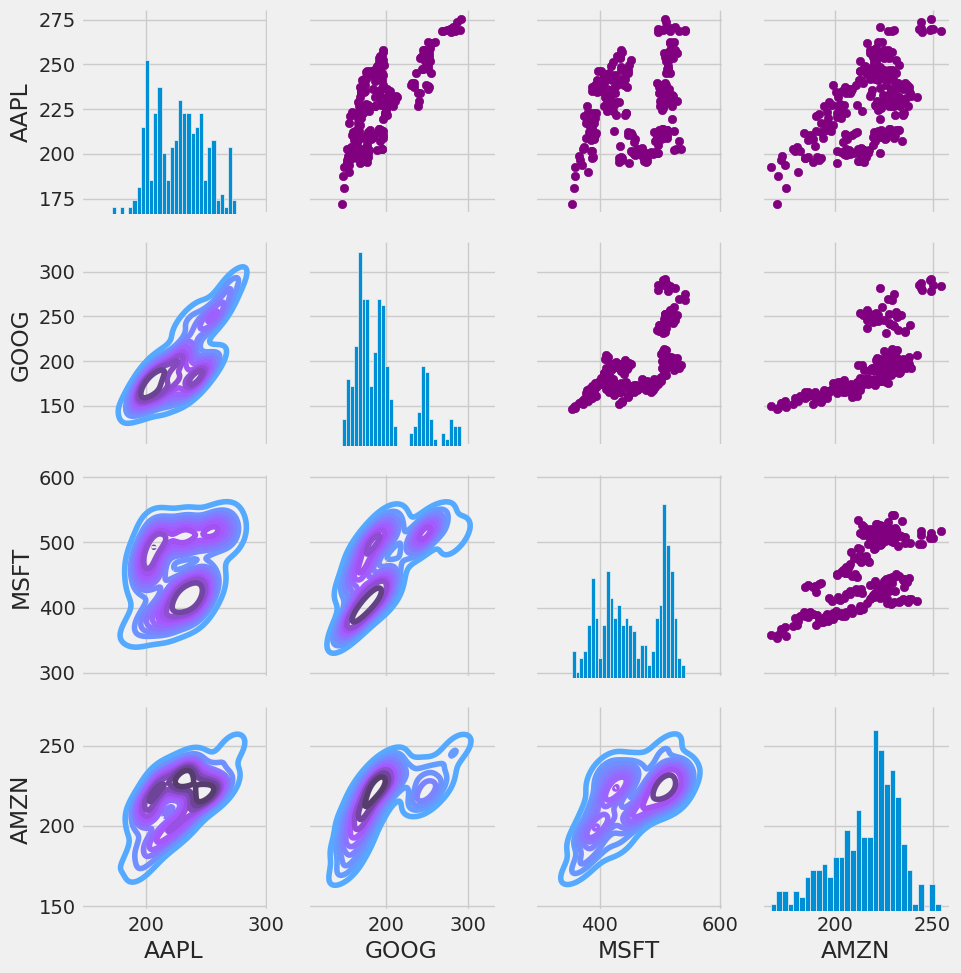

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of Stock Closing Prices')

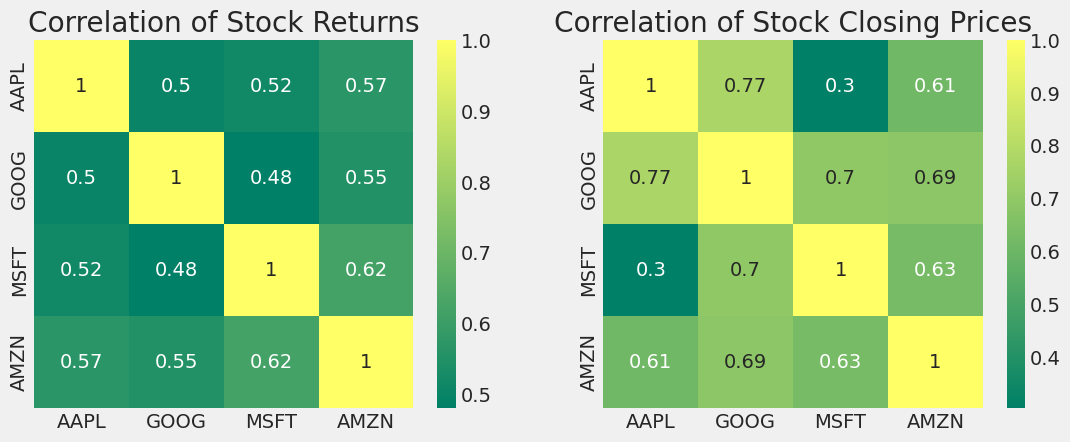

In [37]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap="summer")
plt.title('Correlation of Stock Returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Prices')

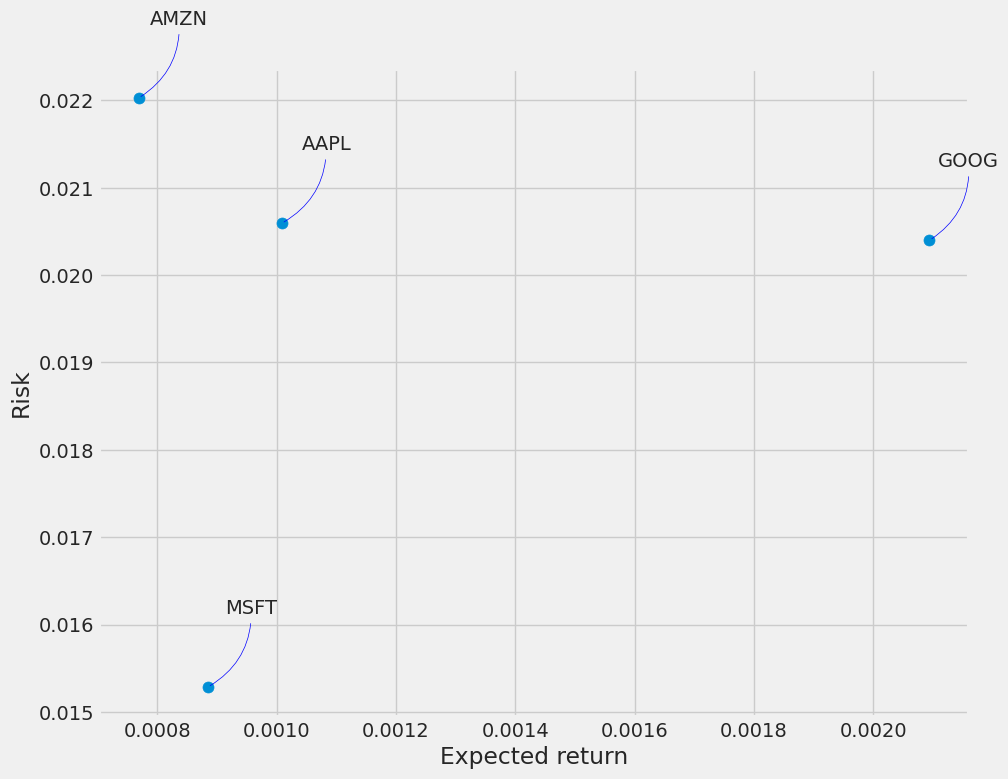

In [48]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops={'arrowstyle':'-', 'color':'blue', 'connectionstyle':'arc3,rad=-0.3'})

In [41]:
rets.std()

,0
AAPL,0.020593
GOOG,0.020399
MSFT,0.015284
AMZN,0.022027
